

<a id="0"></a>

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Car Price Prediction</p>

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

<a id="1"></a>

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read Traning Dataset</p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Cars%20Price%20Dataset/CarPrice_Assignment.csv")
df.shape

(205, 26)

In [22]:
df_copy = df.copy()

In [23]:
df_copy.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [24]:
df_copy.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
df_copy = df_copy.drop(labels=['car_ID','CarName'], axis=1)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [32]:
df_copy.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<a id="1"></a>

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Perfoming EDA </p>

# Catategorical and Continious Serperation 

In [33]:
cat = list(df_copy.columns[df_copy.dtypes == 'object'])
con = list(df_copy.columns[df_copy.dtypes != 'object'])

In [34]:
cat

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [35]:
con

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

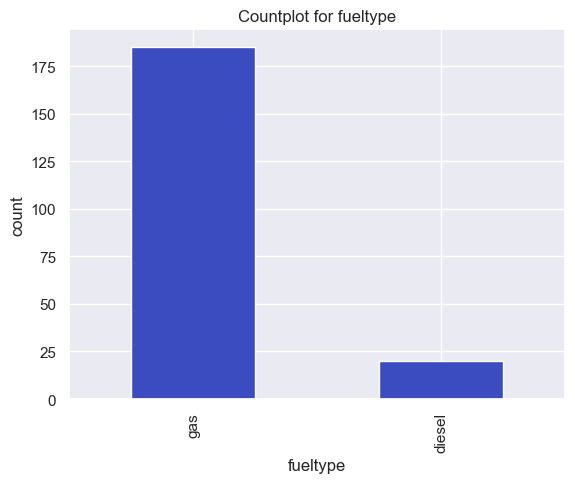

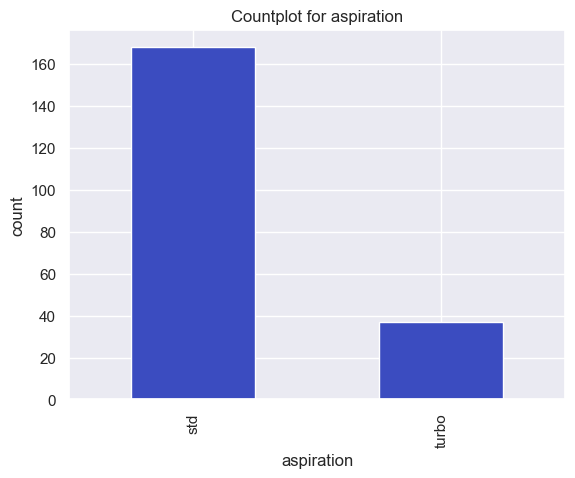

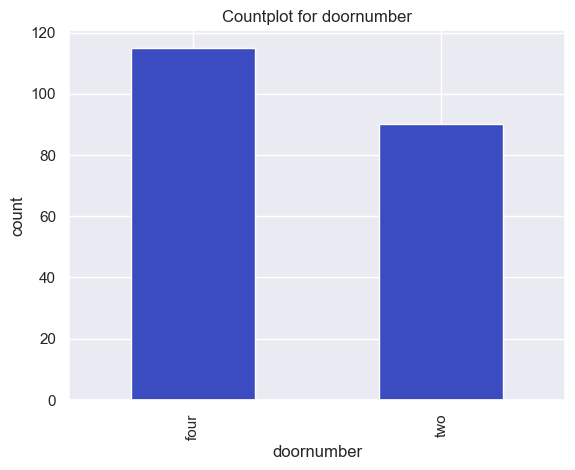

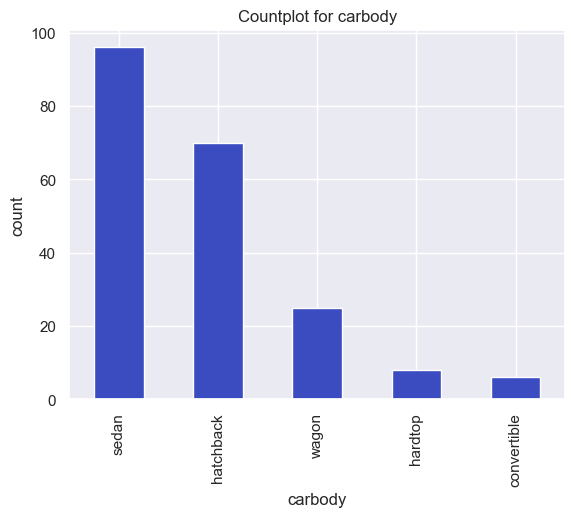

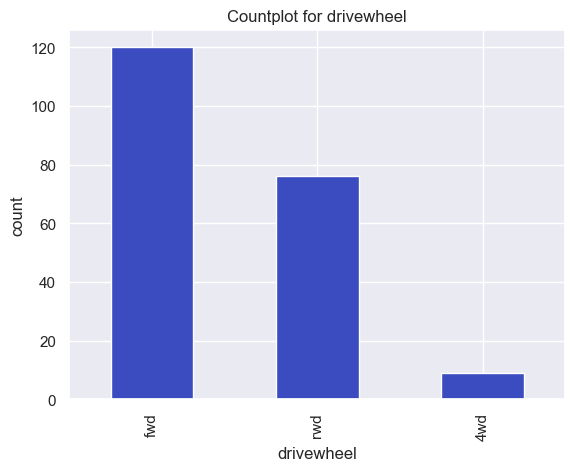

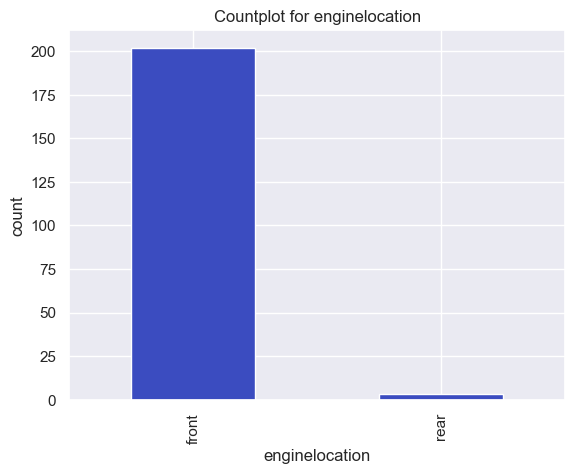

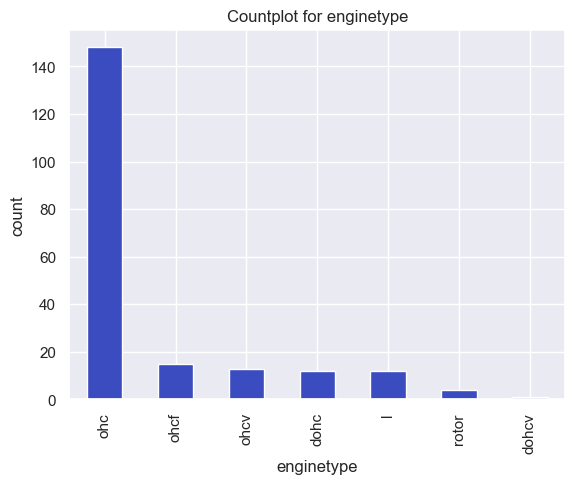

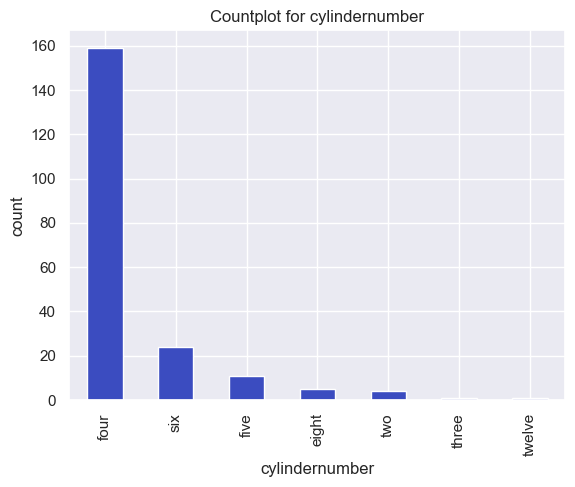

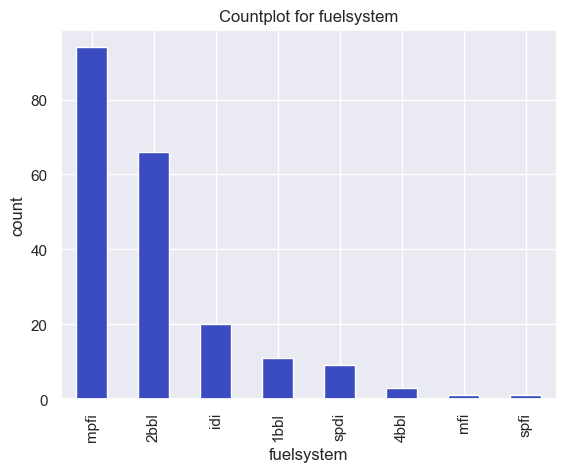

In [72]:
for i in cat:
    df[i].value_counts().plot(kind='bar',xlabel=f'{i}',ylabel='count',title=f'Countplot for {i}', colormap='coolwarm')
    plt.show()

In [37]:
df[con].corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


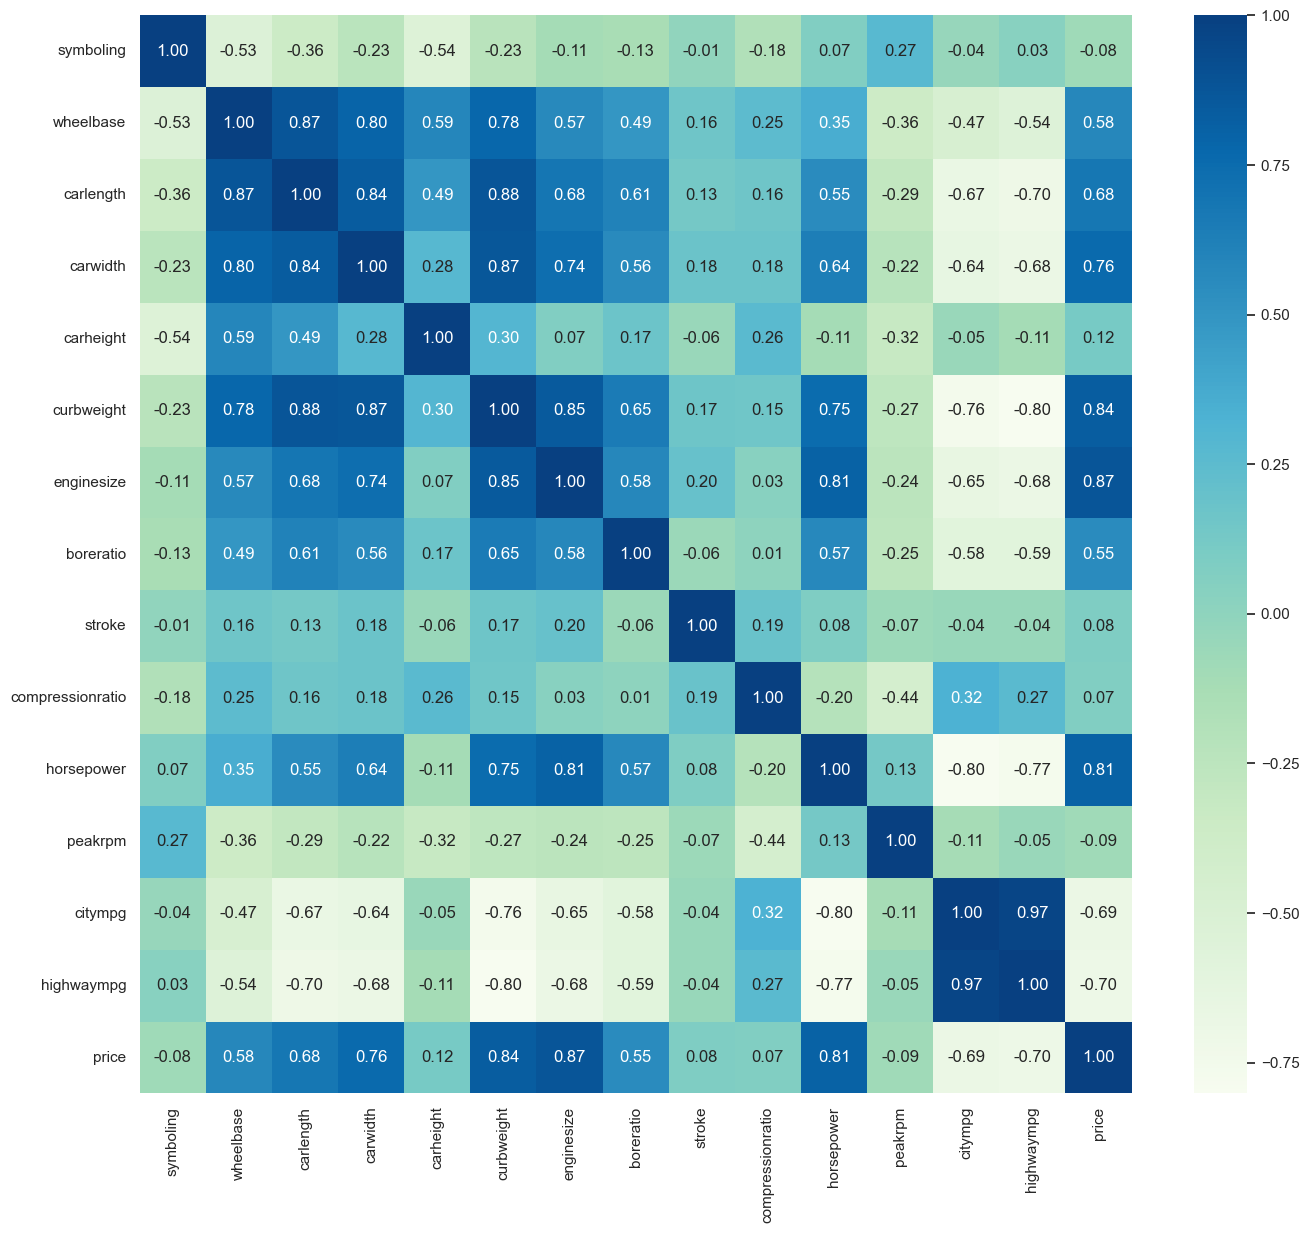

In [77]:
plt.figure(figsize=(16,14))
sns.heatmap(df[con].corr(), cmap="GnBu", annot=True, fmt='.2f')
plt.show()

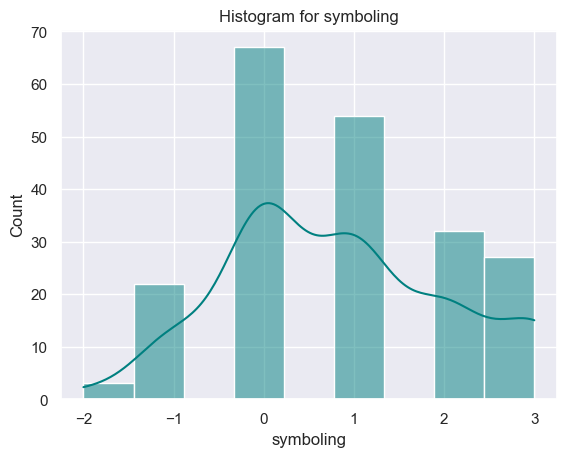

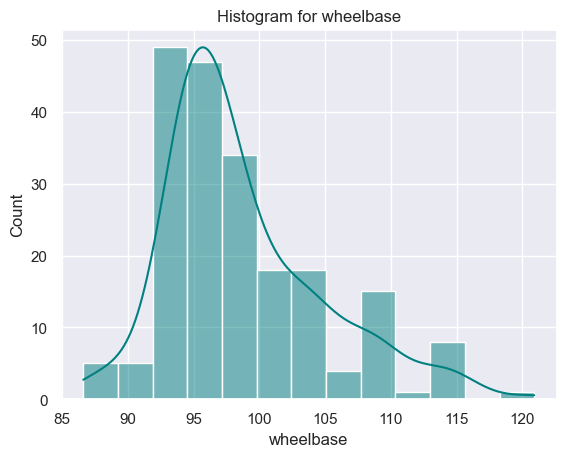

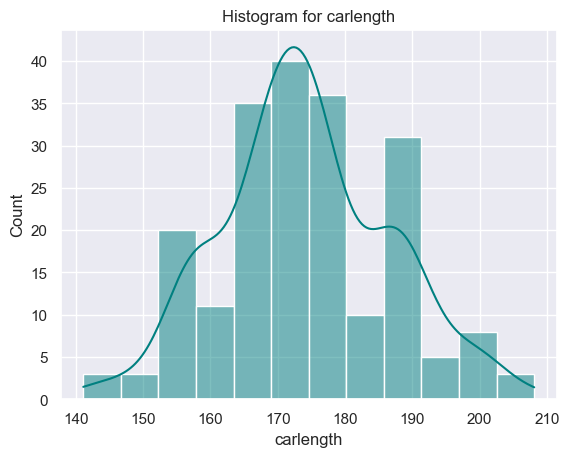

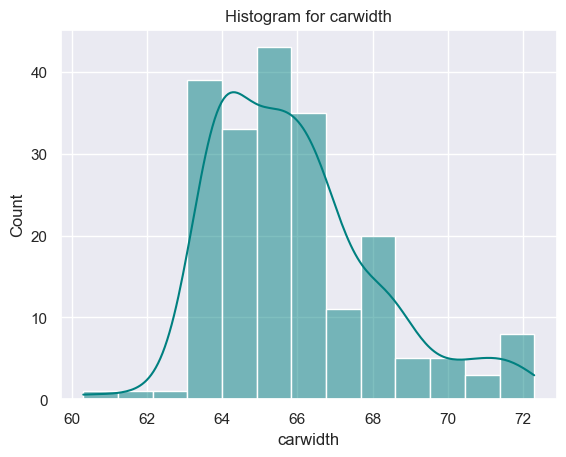

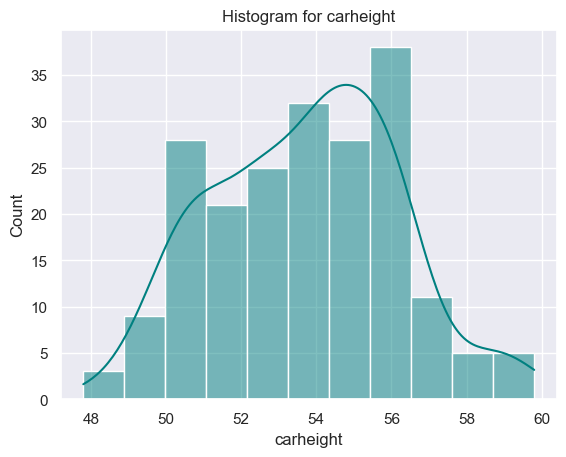

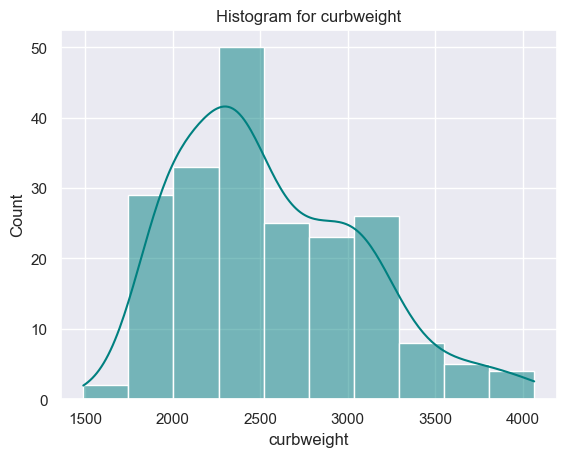

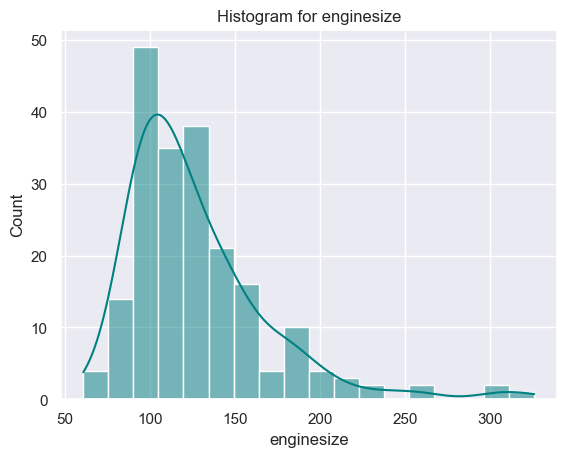

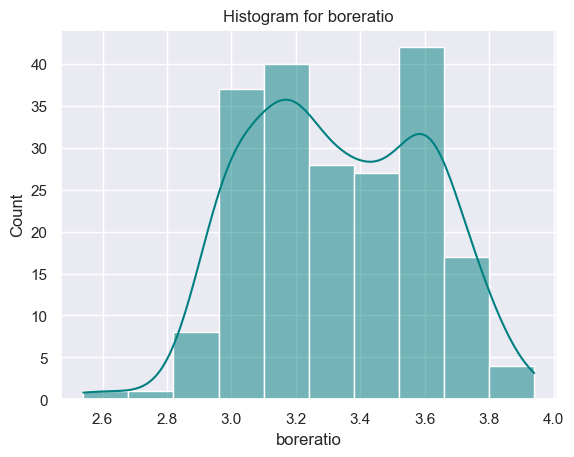

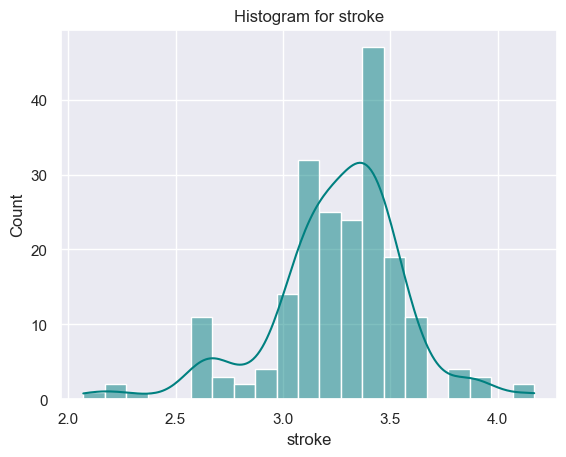

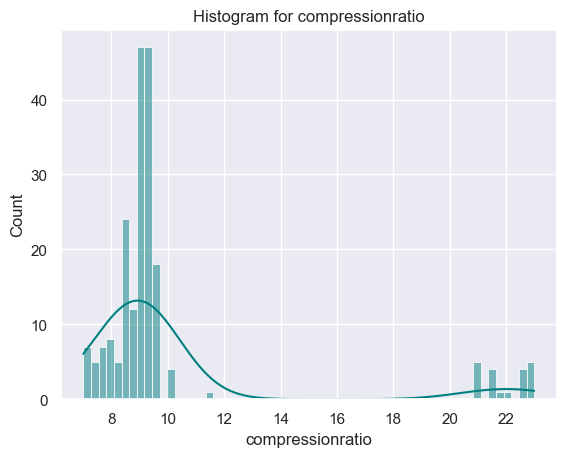

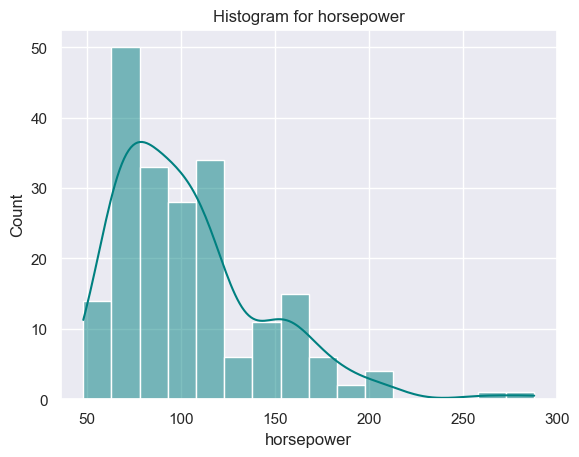

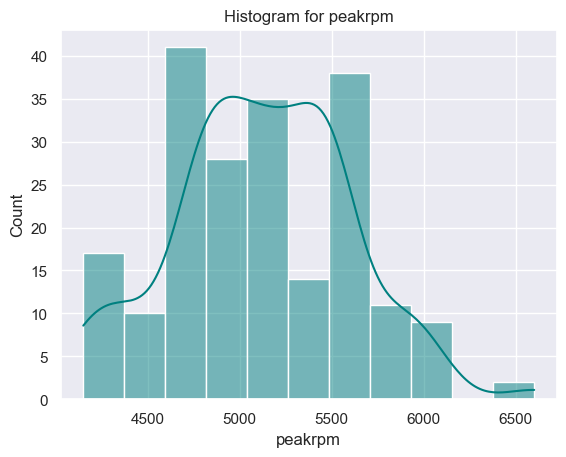

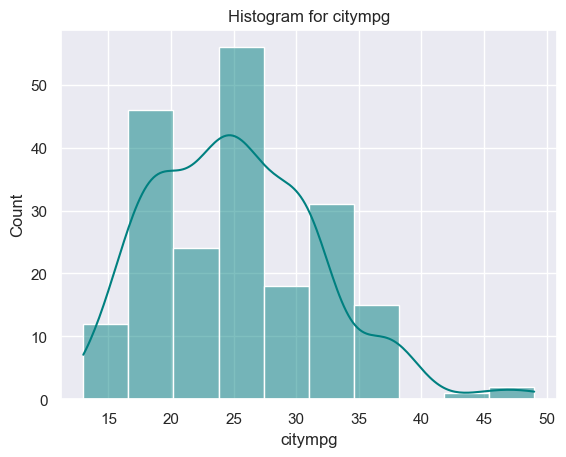

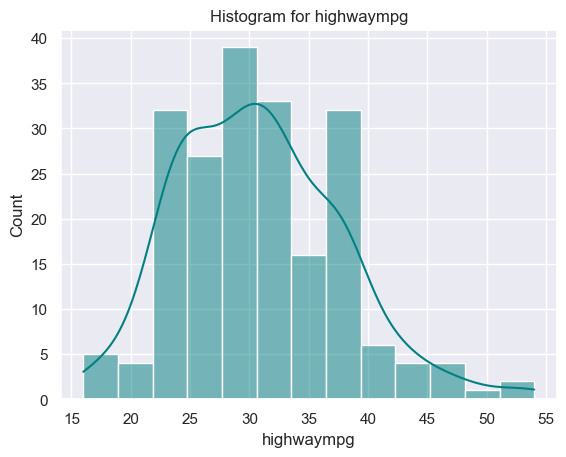

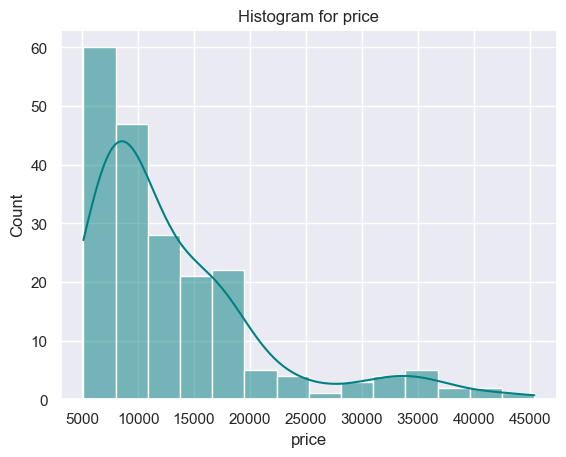

In [59]:
for i in con:
    sns.histplot(data=df,x=i,kde=True,color='teal')
    plt.title(f'Histogram for {i}')
    plt.show()

# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Data Preprocessing with Sklearn pipelines</p>


In [80]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Seperating the Dependent and Independent column 

In [84]:
X = df.drop(labels=['car_ID','price'],axis=1)
Y = df[['price']]

In [85]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [86]:
Y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


## Seperating the Categorical and Continious Fratures

In [87]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [88]:
cat

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [89]:
con

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## Creating a Pipeline for Feature Selection

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [92]:
# Creating pipeline For Continious Fratures.
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                        ('scaler',StandardScaler())])
# Creating Pipeline for Categorical Features.
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                        ('ohe',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                        ('cat',cat_pipe,cat)])

In [93]:
X_pre = pre.fit_transform(X)

In [94]:
X_pre

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  0.        ,
         2.        ,  5.        ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  0.        ,
         2.        ,  5.        ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  5.        ,
         3.        ,  5.        ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  5.        ,
         3.        ,  5.        ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  3.        ,
         3.        ,  3.        ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  3.        ,
         2.        ,  5.        ]])

In [95]:
cols = pre.get_feature_names_out()

In [96]:
cols

array(['num__symboling', 'num__wheelbase', 'num__carlength',
       'num__carwidth', 'num__carheight', 'num__curbweight',
       'num__enginesize', 'num__boreratio', 'num__stroke',
       'num__compressionratio', 'num__horsepower', 'num__peakrpm',
       'num__citympg', 'num__highwaympg', 'cat__CarName', 'cat__fueltype',
       'cat__aspiration', 'cat__doornumber', 'cat__carbody',
       'cat__drivewheel', 'cat__enginelocation', 'cat__enginetype',
       'cat__cylindernumber', 'cat__fuelsystem'], dtype=object)

In [99]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__symboling,num__wheelbase,num__carlength,num__carwidth,num__carheight,num__curbweight,num__enginesize,num__boreratio,num__stroke,num__compressionratio,...,cat__CarName,cat__fueltype,cat__aspiration,cat__doornumber,cat__carbody,cat__drivewheel,cat__enginelocation,cat__enginetype,cat__cylindernumber,cat__fuelsystem
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,3.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,1.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,4.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,5.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0


# <p style="padding:10px;background-color:#E6E6E6 ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Feature Selection</p>
* Forward Elimination process base model LinearRegression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [103]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='forward', n_jobs=-1)
sel_features = sel.fit_transform(X_pre,Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__symboling', 'num__carwidth', 'num__enginesize',
       'num__boreratio', 'num__stroke', 'num__compressionratio',
       'num__peakrpm', 'num__citympg', 'num__highwaympg',
       'cat__doornumber', 'cat__carbody', 'cat__enginelocation'],
      dtype=object)

In [112]:
imp_cols[1].split('__')[1]

'carwidth'

In [113]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [114]:
sel_cols

['symboling',
 'carwidth',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg',
 'doornumber',
 'carbody',
 'enginelocation']

In [117]:
X_sel = df[sel_cols]
X_sel.head()

,symboling,carwidth,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,doornumber,carbody,enginelocation
0,3,64.1,130,3.47,2.68,9.0,5000,21,27,two,convertible,front
1,3,64.1,130,3.47,2.68,9.0,5000,21,27,two,convertible,front
2,1,65.5,152,2.68,3.47,9.0,5000,19,26,two,hatchback,front
3,2,66.2,109,3.19,3.40,10.0,5500,24,30,four,sedan,front
4,2,66.4,136,3.19,3.40,8.0,5500,18,22,four,sedan,front


In [134]:
cat = list(X_sel.columns[X_sel.dtypes == 'object'])

In [135]:
cat

['doornumber', 'carbody', 'enginelocation']

In [137]:
data = df[cat]

In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(data)
df_cat = pd.DataFrame(ohe.transform(data).toarray(), columns=ohe.get_feature_names_out())

In [139]:
df_cat

,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
201,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
202,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [141]:
con = list(X_sel.columns[X_sel.dtypes != 'object'])

con_data = df[con]

In [143]:
df_tidy = pd.merge(right=df_cat, left=con_data, left_index=True, right_index=True)

## Bulding the final Model

In [144]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_tidy,Y,test_size=0.2,random_state=24)

In [145]:
xtrain.shape

(164, 18)

In [146]:
xtest.shape

(41, 18)

In [149]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [152]:
y_pred = model.predict(xtest)

In [153]:
model.score(xtrain,ytrain)

0.8822272902463111

In [154]:
model.score(xtest,ytest)

0.7844050307564581

In [155]:
from Myfunction import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model)

Training Results:
MSE  : 8001504.55
RMSE : 2828.69
MAE  : 2034.49
R2   : 0.8822


Testing Results:
MSE  : 9744604.92
RMSE : 3121.63
MAE  : 2389.46
R2   : 0.7844
